In [1]:
import copy
import numpy as np

from dm_control import suite

import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [2]:
def display_video(frames, framerate=30):
    height, width, _ = frames[0].shape
    dpi = 70
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')  # Switch to headless 'Agg' to inhibit figure rendering.
    fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
    matplotlib.use(orig_backend)  # Switch back to the original backend.
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
        im.set_data(frame)
        return [im]
    interval = 1000/framerate
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=interval, blit=True, repeat=False)
    return anim


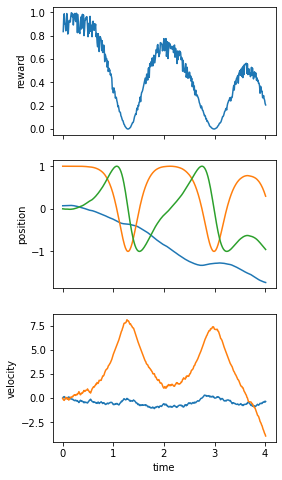

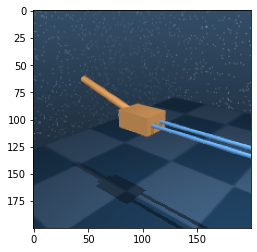

In [3]:
random_state = np.random.RandomState(42)

env = suite.load("cartpole", "balance")
spec = env.action_spec()

duration = 4  # Seconds
frames = []
ticks = []
rewards = []
observations = []

while env.physics.data.time < duration:
    action = random_state.uniform(spec.minimum, spec.maximum, spec.shape)
    time_step = env.step(action)

    camera0 = env.physics.render(camera_id=0, height=200, width=200)
    camera1 = env.physics.render(camera_id=1, height=200, width=200)
    frames.append(np.hstack((camera0, camera1)))
    rewards.append(time_step.reward)
    observations.append(copy.deepcopy(time_step.observation))
    ticks.append(env.physics.data.time)

    #print(env.physics.data.time, time_step)

anim = display_video(frames, framerate=1./env.control_timestep())

num_sensors = len(time_step.observation)

_, ax = plt.subplots(1 + num_sensors, 1, sharex=True, figsize=(4, 8))
ax[0].plot(ticks, rewards)
ax[0].set_ylabel('reward')
ax[-1].set_xlabel('time')

for i, key in enumerate(time_step.observation):
    data = np.asarray([observations[j][key] for j in range(len(observations))])
    ax[i+1].plot(ticks, data, label=key)
    ax[i+1].set_ylabel(key)

writervideo = animation.FFMpegWriter(fps=1./env.control_timestep())
anim.save('cartpole.mp4', writer=writervideo)

plt.figure()
plt.imshow(camera1)

In [4]:
print(time_step)
print(np.concatenate(list(time_step.observation.values())))


TimeStep(step_type=<StepType.MID: 1>, reward=0.20659867770700488, discount=1.0, observation=OrderedDict([('position', array([-1.73035599,  0.29619756, -0.9551267 ])), ('velocity', array([-0.33523315, -3.91798672]))]))
[-1.73035599  0.29619756 -0.9551267  -0.33523315 -3.91798672]


In [5]:
from util.util import DMC2GymWrapper

env_dmc = suite.load("cartpole", "balance")
env_gym = DMC2GymWrapper(env_dmc, max_step=100)

In [6]:
obs = env_gym.reset()
for i in range(2000):
    obs, r, done, info = env_gym.step(env_gym.action_space.sample())
    print(env_gym._step, obs, r, done, info)
    if done:
        print("Done!")
        break

1 [-0.09737361  0.99998947  0.00458917 -0.09099467  0.09518964] 0.8731861491077438 False {}
2 [-0.09847117  0.99998307  0.0058193  -0.12851972  0.15086981] 0.9666418837481864 False {}
3 [-0.10009599  0.99996935  0.00782977 -0.19644601  0.251286  ] 0.897620402958716 False {}
4 [-0.10198274  0.99994762  0.01023497 -0.18090698  0.22983607] 0.9894654068965445 False {}
5 [-0.10373544  0.99992239  0.01245855 -0.16963537  0.21496581] 0.9920545672644222 False {}
6 [-0.10582824  0.99988451  0.01519786 -0.24892648  0.33301622] 0.8605088726909482 False {}
7 [-0.10820895  0.99983107  0.01838036 -0.22722051  0.30365587] 0.9823788959030058 False {}
8 [-0.11037813  0.99977357  0.02127944 -0.20661901  0.27635054] 0.9838959077012064 False {}
9 [-0.11257462  0.99970595  0.02424887 -0.23268251  0.31776449] 0.9775738678093473 False {}
10 [-0.11467175  0.99963252  0.02710752 -0.18674701  0.25422847] 0.9485577444116031 False {}
11 [-0.11612281  0.99957768  0.02905961 -0.10346771  0.13639582] 0.8488483857497